<a href="https://colab.research.google.com/github/Aditya007-d/Aditya007-d/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/sample_data/Tweets (1).csv")

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
  text = text.lower()
  words = text.split()
  words = [stemmer.stem(words) for word in words if word not in stopwords]
  return " ".join(words)

  df['text'] = df['text'].apply(preprocess)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['text'])
y = df['airline_sentiment']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
accuracy = knn.score(x_test, y_test)
print("Accuracy", accuracy)

Accuracy 0.7278005464480874


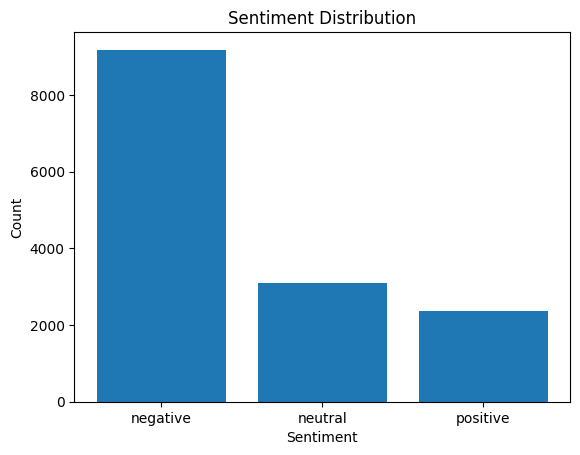

In [12]:
import matplotlib.pyplot as plt

sentiment_counts = df['airline_sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

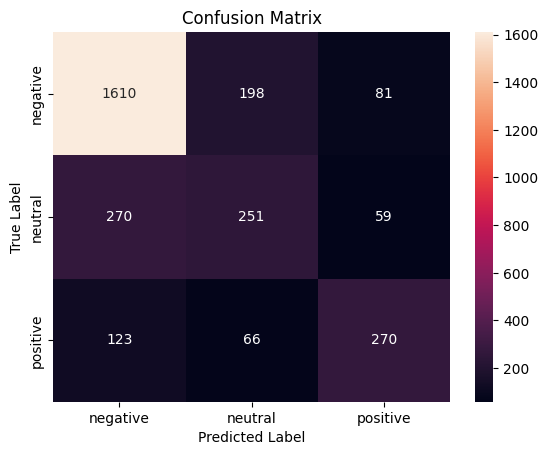

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()